In [1]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.loggers import WandbLogger
from torch.utils.data import DataLoader

from src.models.con_vqvae import InfoNCE_VQVAE
from src.models.con_vqvae import BarlowTwinsVQVAE

from src.preprocessing.augmentations import Augmentations
from src.preprocessing.preprocess_ucr import AugUCRDataset, UCRDataset, UCRDatasetImporter
from src.preprocessing.data_pipeline import build_data_pipeline
from src.utils import load_yaml_param_settings
from src.utils import save_model

import numpy as np

import matplotlib.pyplot as plt


In [2]:
config_dir = 'src/configs/config.yaml' #dir to config file

config = load_yaml_param_settings(config_dir)

# data pipeline
dataset_importer = UCRDatasetImporter(**config['dataset'])
batch_size = config['dataset']['batch_sizes']['vqvae']
train_data_loader_non_aug, test_data_loader= [build_data_pipeline(batch_size, dataset_importer, config, kind) for kind in ['train', 'test']]

augmentations = ['STFT']
train_data_loader_aug = build_data_pipeline(batch_size, dataset_importer, config, "train", ['STFT'])

augmentations = ['STFT']
train_data_loader_aug = build_data_pipeline(batch_size, dataset_importer, config, "train", augmentations)

for batch in train_data_loader_aug:
    subxs, y = batch
    break

self.X_train.shape: (1000, 1024)
self.X_test.shape: (8236, 1024)
# unique labels (train): [0 1 2]
# unique labels (test): [0 1 2]


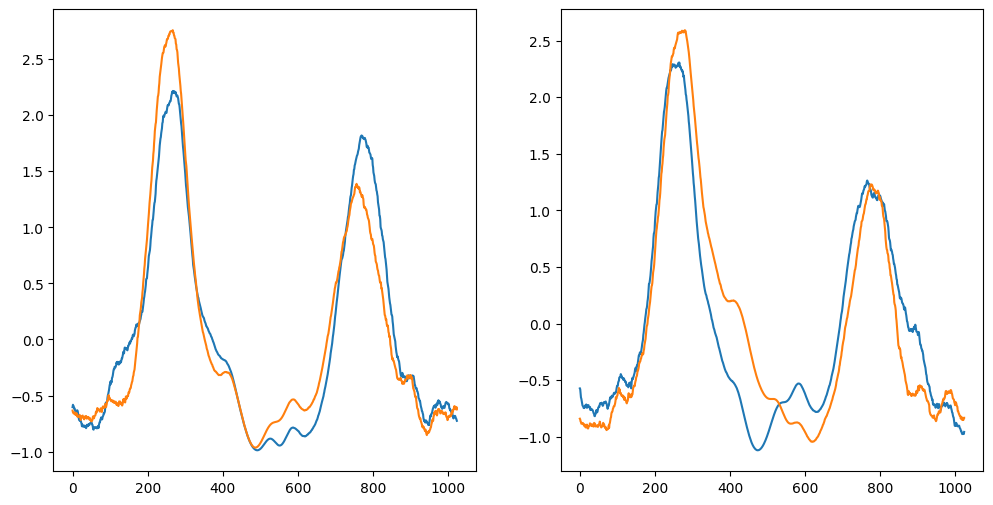

In [10]:


x11, x21 = subxs[0]
x12, x22 = subxs[1]

x11 = x11.squeeze(1)
x21 = x21.squeeze(1)
x12 = x12.squeeze(1)
x22 = x22.squeeze(1)

f, a = plt.subplots(1, 2, figsize=(12, 6))
i = 15
a[0].plot(x11[i])
a[0].plot(x21[i])
a[1].plot(x12[i])
a[1].plot(x22[i])